# Lab 8 : Star Formation 

In [2]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [48]:
def SFR(L,Type,TIR=0):
    '''
    function that computes the star formation rate (SFR) of a galaxy following
    Kennicutt & Evans 2012 Eq 12 (ARA&A 50)
    PARAMETERS
    ----------
    L = 'float'
        luminosity of the galaxy in erg/s
    Type = 'string'
        the wavelength: 'FUV','NUV','TIR','Halpha'
    TIR = 'float'
        total infrared luminosity in erg/s (default=0)

    OUTPUT
    ------
    SFR = 'float'
        log of the star formation rate (Msun/yr)

    '''
    if (Type == 'FUV'):
        logCx = 43.35 # calibration from LFUV to SFR
        TIRc = 0.46 # correction for dust absorption
    elif (Type == 'NUV'):
        logCx = 43.17
        TIRc = 0.27
    elif (Type == 'TIR'):
        logCx = 43.41
        TIRc = 0
    elif (Type == 'Halpha'):
        logCx = 41.27
        TIRc = 0.0024
    else:
        print('WARNING: Missing the wavelength ("FUV","NUV","TIR","Halpha")')

    # Correct luminosiy for dust
    Lcorr = L+TIRc*TIR

    # star formation rate
    sfr = np.log10(Lcorr) - logCx

    return sfr
    
        

Let's try to reproduce SFRs derived for the WLM Dwarf Irregular Galaxy using UV luminosities measured with Galex. 

Compare results to Table 1 from Lee et al. 2009 (who used the older Kennicutt 98 methods)
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED (Photometry and SED):
https://ned.ipac.caltech.edu/

In [56]:
# First need the Luminosity of the Sun in the right units (erg/s)
LsunErgS = const.L_sun.to(u.erg/u.s).value #number not astrpy quantity
print(LsunErgS)

3.828e+33


In [58]:
#  WLM Dwarf Irregular Galaxy from NED data
NUV_WLM = 1.71e7*LsunErgS
TIR_WLM = 2.48e6*LsunErgS+3.21e5*LsunErgS+2.49e6*LsunErgS  
# TIR = nearIR + midIR + farIR

In [62]:
# Test
SFR(NUV_WLM,'NUV',TIR=0)  # not the answer others got, something is off

-2.3540319605030433

# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift, given its stellar mass

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [65]:
# not easy to observe H2 so we measure intensity of CO emission and apply X(CO) conversion factor to get an H2 column density
def SFRMS(Mstar,z): # star formation rate main sequence
    '''
    Function that computes the average SFR of a galaxy as a function of stellar mass and redshift
    PARAMETERS
    ----------
    Mstar = 'float'
        stellar mass of the galaxy in Msun
    z = 'float'
        redshift

    OUTPUTS
    -------
    SFR = 'float'
        log of the star formation rate (Msun/yr)
    '''
    alpha = 0.7-0.13*z
    beta = 0.38+1.14*z-0.19*z**2
    SFR = alpha*(np.log10(Mstar)-10.5)+beta

    return SFR

# Step 2

In [68]:
# MW stellar mass (disk) at z=0
MWstar = 7.5e10

In [72]:
# SFR for a MW type galaxy
print(SFRMS(MWstar,0))
print(10**SFRMS(MWstar,0))

0.64254288437419
4.390792203431891


In [75]:
# MW at z = 1
print(SFRMS(MWstar,1))
print(10**SFRMS(MWstar,1))

1.5437849201332692
34.97719031976979


# Step 3

In [77]:
# create an array of stellar masses
Mass = np.linspace(1e8,1e12)

<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
/var/folders/9l/bypjqy711gb6pv49gxd3zk980000gn/T/ipykernel_43314/1609828406.py:13: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Log(Mstar (M$_\odot$))', fontsize=12)
/var/folders/9l/bypjqy711gb6pv49gxd3zk980000gn/T/ipykernel_43314/1609828406.py:14: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


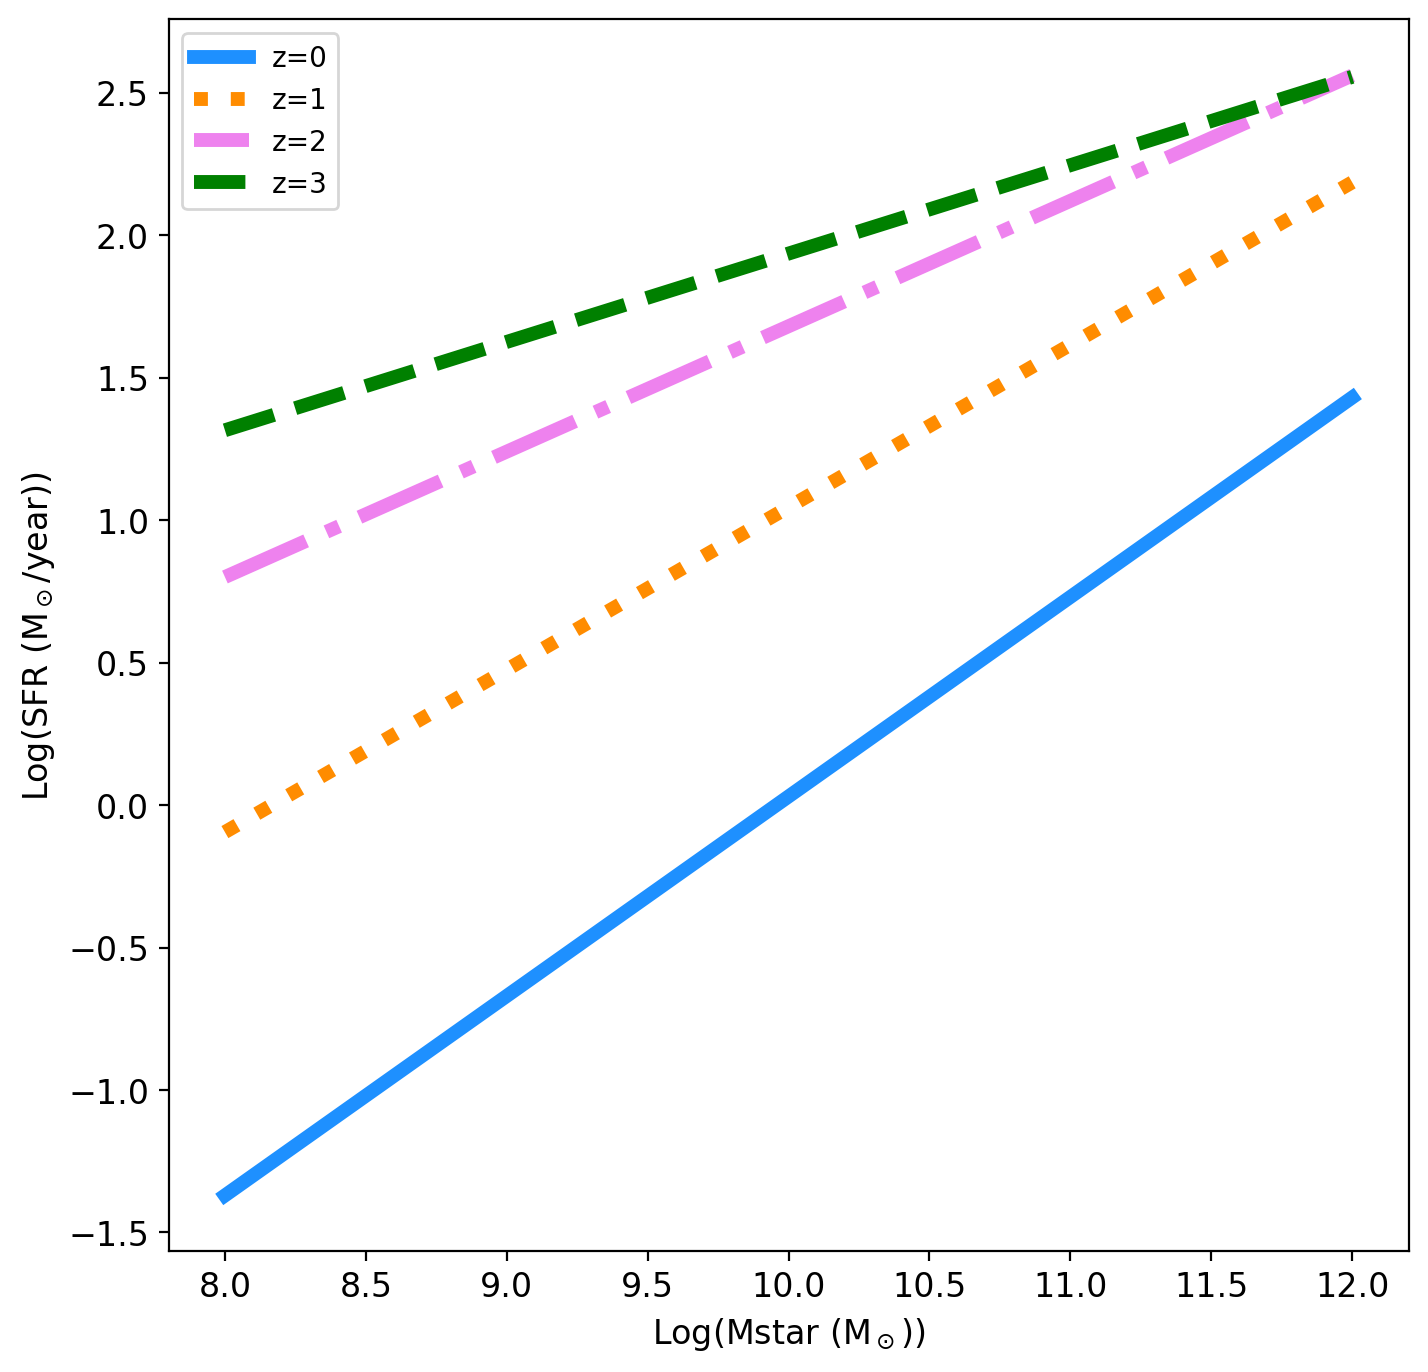

In [133]:

fig = plt.figure(figsize=(8,8), dpi=200)
ax = plt.subplot(111)

# add log log plots
plt.plot(np.log10(Mass),SFRMS(Mass,0), color='dodgerblue',linewidth=5,label='z=0')
plt.plot(np.log10(Mass),SFRMS(Mass,1), color='darkorange',linewidth=5, linestyle=':',label='z=1')
plt.plot(np.log10(Mass),SFRMS(Mass,2), color='violet',linewidth=5,linestyle='-.',label='z=2')
plt.plot(np.log10(Mass),SFRMS(Mass,3), color='green',linewidth=5,linestyle='--',label='z=3')



# Add axis labels
plt.xlabel('Log(Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left')


# Save file
#plt.savefig('Lab8_SFR_MainSequence.png')


* star formation is dominated by lower mass galaxies over time so older galaxies are believed to form more stars up until about z~2 then SFR starts to decrease with redshift (cosmic downsizing)
* cosmic noon occurs due to the peak of merger rates at around z~2, these mergers triggered star formation (most account for dust)

# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [135]:
# normal galaxies 
TIR_normal = 1e10*LsunErgS 
print(10**SFR(TIR_normal,"TIR"))

1.4892648150381245


In [139]:
# LIRGs  
TIR_LIRG = 1e11*LsunErgS 
print(10**SFR(TIR_LIRG,"TIR"))

14.892648150381245


In [141]:
# ULIRGs
TIR_ULIRG = 1e12*LsunErgS 
print(10**SFR(TIR_ULIRG,"TIR"))

148.92648150381245


In [137]:
# HLIRGs
TIR_HLIRG = 1e13*LsunErgS 
print(10**SFR(TIR_HLIRG,"TIR"))

1489.2648150381244
